## Importing the relevant libraries

In [255]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os

#For date transformations
import xlrd
import calendar
from datetime import datetime

#Code Execution Modifications
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = 'white'

## Loading the data

In [256]:
cab_data_df = pd.read_csv("DataSets/Cab_Data.csv")
city_df = pd.read_csv("DataSets/City.csv")
customers_df = pd.read_csv("DataSets/Customer_ID.csv")
transactions_df = pd.read_csv("DataSets/Transaction_ID.csv")

## Getting Metadata for Data Intake Report

In [257]:
folder_path = './DataSets/'
# Getting a list of all the CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Looping through the list of CSV files
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    size_in_bytes = os.path.getsize(file_path)
    print(f"{file}")
    print(f"Size (in KB): {size_in_bytes/1024}")
    df = pd.read_csv(file_path)
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print(f"Number of duplicate records: {df.duplicated().sum()}")
    print("---------------------------------------------------")
del df

Cab_Data.csv
Size (in KB): 20662.705078125
Number of rows: 359392
Number of columns: 7
Number of duplicate records: 0
---------------------------------------------------
City.csv
Size (in KB): 0.7412109375
Number of rows: 20
Number of columns: 3
Number of duplicate records: 0
---------------------------------------------------
Customer_ID.csv
Size (in KB): 1026.5771484375
Number of rows: 49171
Number of columns: 4
Number of duplicate records: 0
---------------------------------------------------
Transaction_ID.csv
Size (in KB): 8787.298828125
Number of rows: 440098
Number of columns: 3
Number of duplicate records: 0
---------------------------------------------------


## Data Cleaning

### 1. cab_data

In [258]:
cab_data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [259]:
cab_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [260]:
trips_df_cleaned = cab_data_df.copy()
#Converting cab_data['Date of Travel'] data type from excel serial number to date data type
trips_df_cleaned['Date of Travel'] = trips_df_cleaned['Date of Travel'].apply(lambda x: xlrd.xldate_as_datetime(x,0).date().isoformat())

In [261]:
#Adding state name for Orange County and Silicon Valley
for index, city_name in enumerate(trips_df_cleaned['City']):
    if city_name.lower() in ['orange county','silicon valley']:
        trips_df_cleaned['City'].loc[index] = city_name+" CA"
trips_df_cleaned['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY CA', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY CA',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [262]:
trips_df_cleaned.shape

(359392, 7)

### 2. City

In [263]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [264]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [265]:
city_cleaned = city_df.copy()
#Converting population and users data type from string to int
city_cleaned['Population'] = city_cleaned['Population'].apply(lambda x: int(re.sub(",","",x)))
city_cleaned['Users'] = city_cleaned['Users'].apply(lambda x: int(re.sub(",","",x)))
city_cleaned.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [266]:
sorted(city_cleaned['City'])

['ATLANTA GA',
 'AUSTIN TX',
 'BOSTON MA',
 'CHICAGO IL',
 'DALLAS TX',
 'DENVER CO',
 'LOS ANGELES CA',
 'MIAMI FL',
 'NASHVILLE TN',
 'NEW YORK NY',
 'ORANGE COUNTY',
 'PHOENIX AZ',
 'PITTSBURGH PA',
 'SACRAMENTO CA',
 'SAN DIEGO CA',
 'SAN FRANCISCO CA',
 'SEATTLE WA',
 'SILICON VALLEY',
 'TUCSON AZ',
 'WASHINGTON DC']

In [267]:
#Adding state name for Orange County and Silicon Valley
for index, city_name in enumerate(city_cleaned['City']):
    if city_name.lower() in ['orange county','silicon valley']:
        city_cleaned['City'].loc[index] = city_name+" CA"
city_cleaned['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY CA', 'ORANGE COUNTY CA', 'SAN DIEGO CA',
       'PHOENIX AZ', 'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX',
       'SEATTLE WA', 'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA',
       'PITTSBURGH PA', 'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'],
      dtype=object)

In [268]:
#Checking if all cities of city_cleaned are also present in trips_df_cleaned
print(f"Number of cities in trips dataframe: {trips_df_cleaned['City'].nunique()}")
print(f"Number of cities in city dataframe: {city_cleaned['City'].nunique()}")
#Extra records will be ignored while merging the data

Number of cities in trips dataframe: 19
Number of cities in city dataframe: 20


### 3. Customer_ID

In [269]:
customers_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [270]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [271]:
customers_df['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [272]:
#This dataset doesn't seem to require any cleaning
customers_cleaned = customers_df.copy()

### 4. Transactions_ID

In [273]:
transactions_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [274]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [275]:
transactions_cleaned = transactions_df.copy()

In [276]:
#Comparing unique count of Customer ID of transactions and customers dataframe
print(f"Unique count of customers in transactions df: {transactions_cleaned['Customer ID'].nunique()}")
print(f"Unique count of customers in customers df: {customers_cleaned['Customer ID'].nunique()}")

Unique count of customers in transactions df: 49171
Unique count of customers in customers df: 49171


In [277]:
#Comparing unique count of Transaction ID of transactions and trips_df_cleaned dataframe
print(f"Unique count of transactions in transactions df: {transactions_cleaned['Transaction ID'].nunique()}")
print(f"Unique count of transactions in  trips_df_cleaned: {trips_df_cleaned['Transaction ID'].nunique()}")
#Extra records will be ignored while merging the data

Unique count of transactions in transactions df: 440098
Unique count of transactions in  trips_df_cleaned: 359392


## Merging the data

In [278]:
merged_df = trips_df_cleaned.merge(transactions_cleaned,how="left",on="Transaction ID").merge(customers_cleaned,how="left",on="Customer ID").merge(city_cleaned,how="left", on="City")
merged_df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318,Cash,Male,25,13984,814885,24701
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788,Card,Male,23,23788,698371,14978
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106,Card,Male,19,19980,698371,14978
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799,Cash,Male,33,19271,248968,80021
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982,Cash,Male,57,5068,248968,80021


In [321]:
merged_df['Date of Travel'].min()

'2016-01-02'

In [279]:
merged_df['Date of Travel'].max()

'2018-12-31'

In [280]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 41.1+ MB


## Data preprocessing for merged_df

In [281]:
merged_df_updated = merged_df.copy()

#### 1. Checking if any null values exist

In [282]:
merged_df_updated.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

#### 2. Checking for outliers in numerical features

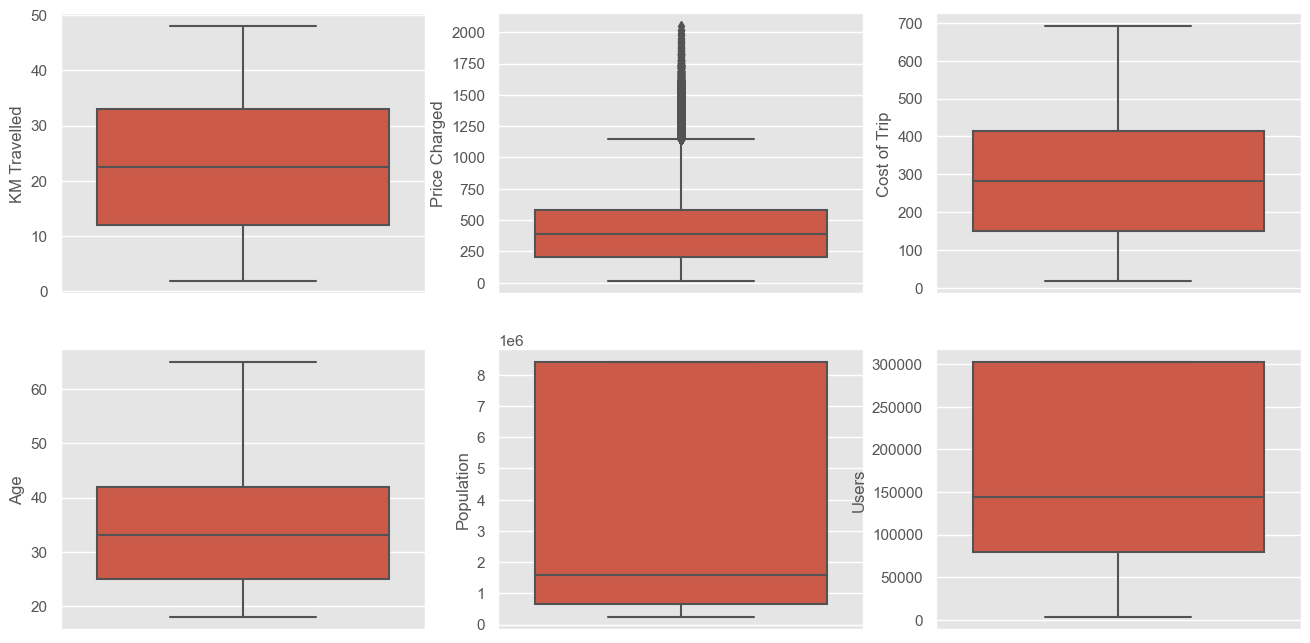

In [283]:
fig, ax = plt.subplots(2,3,figsize=(16,8))
numerical_features = ['KM Travelled','Price Charged','Cost of Trip','Age','Population','Users']

fig_count,ax_count = 0,0
for feature in numerical_features:
    sns.boxplot(data=merged_df_updated,y=feature,ax=ax[fig_count][ax_count])
    if ax_count == 2:
        fig_count+=1
        ax_count=0
        continue
    ax_count+=1

plt.show()

#### Price Charged has outliers but since that can be due to higher cost of long trips, we will not remove that data

In [284]:
#Checking for duplicate values
merged_df_updated.duplicated().sum()

0

#### No Duplicate Records Found

#### 3. Adding columns for further analysis

#### 3.1 Adding various date columns

In [285]:
#Making a column for year
merged_df_updated['Year'] = merged_df_updated['Date of Travel'].apply(lambda year: year.split('-')[0])
merged_df_updated['Year'].value_counts()

2017    128510
2018    123563
2016    107319
Name: Year, dtype: int64

In [286]:
#Making a column for month
month_list=[]
for index, date in enumerate(merged_df_updated['Date of Travel']):
    date_obj = datetime.strptime(date, "%Y-%m-%d")
    month_list.append(date_obj.strftime("%B"))
merged_df_updated['Month name'] = month_list
merged_df_updated['Month name'].value_counts()

December     47007
November     42700
October      40852
September    36859
August       31323
July         27676
June         24713
May          23701
January      23174
March        21646
April        21434
February     18307
Name: Month name, dtype: int64

In [287]:
#Making a column for name of day
day_list=[]
for index, date in enumerate(merged_df_updated['Date of Travel']):
    date_obj = datetime.strptime(date, "%Y-%m-%d")
    day_list.append(date_obj.strftime("%A"))
merged_df_updated['Day name'] = day_list
merged_df_updated['Day name'].value_counts()

Friday       81402
Saturday     78234
Sunday       70310
Thursday     39747
Wednesday    30102
Tuesday      29860
Monday       29737
Name: Day name, dtype: int64

In [288]:
#Making a column for storing date as mm-yyyy format
month_year_list = []
for index, date in enumerate(merged_df_updated['Date of Travel']):
    date_obj = datetime.strptime(str(date),"%Y-%m-%d")
    month_year_list.append(datetime.strftime(date_obj,'%m-%Y'))
merged_df_updated['mm-yyyy'] = month_year_list
merged_df_updated.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month name,Day name,mm-yyyy
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016,January,Friday,01-2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016,January,Wednesday,01-2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,2016,January,Saturday,01-2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,2016,January,Thursday,01-2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,2016,January,Sunday,01-2016


In [289]:
#Making a column for getting day number from date
merged_df_updated['Day number'] = merged_df_updated['Date of Travel'].apply(lambda x: int(x.split("-")[2]))
merged_df_updated['Day number'].value_counts()

17    13421
3     13327
24    13311
10    13255
5     12803
6     12428
8     12407
15    12211
22    12081
1     11954
20    11935
7     11918
29    11688
9     11659
27    11630
13    11576
23    11561
16    11552
21    11416
14    11405
2     11366
19    11318
28    11220
26    11099
12    11067
30    10908
4     10882
18    10431
11    10361
25    10312
31     6890
Name: Day number, dtype: int64

#### 3.2 Making categorical column for KM Travelled

1. Short trip: up to 10 kms
2. Medium trip: 10 to 30 kms
3. Long Trip: more than 30 kms

In [290]:
#Adding the categories to the dataframe
merged_df_updated['Distance Category'] = pd.cut(merged_df_updated['KM Travelled'],
                                        bins=[merged_df_updated['KM Travelled'].min(),10,30,merged_df_updated['KM Travelled'].max()],
                                        labels=['Short Trip','Medium Trip','Long Trip'])
merged_df_updated.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month name,Day name,mm-yyyy,Day number,Distance Category
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016,January,Friday,01-2016,8,Long Trip
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016,January,Wednesday,01-2016,6,Medium Trip
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,2016,January,Saturday,01-2016,2,Short Trip
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,2016,January,Thursday,01-2016,7,Long Trip
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,2016,January,Sunday,01-2016,3,Short Trip


#### 3.3 Making categorical column for Age
18-30,30-45,45-60,60+

In [291]:
#Adding the categories to the dataframe
merged_df_updated['Age Category'] = pd.cut(merged_df_updated['Age'],
                                        bins=[17,30,45,60,120],
                                        labels=['18-30','30-45','45-60','60+'])
merged_df_updated.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Income (USD/Month),Population,Users,Year,Month name,Day name,mm-yyyy,Day number,Distance Category,Age Category
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,...,10813,814885,24701,2016,January,Friday,01-2016,8,Long Trip,18-30
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,...,9237,814885,24701,2016,January,Wednesday,01-2016,6,Medium Trip,18-30
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,...,11242,814885,24701,2016,January,Saturday,01-2016,2,Short Trip,45-60
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,...,23327,814885,24701,2016,January,Thursday,01-2016,7,Long Trip,18-30
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,...,8536,814885,24701,2016,January,Sunday,01-2016,3,Short Trip,30-45


#### 3.4 Making categorical column for Income

(as per https://blogs.worldbank.org/opendata/new-country-classifications-income-level-2017-2018)
Low: up to 1006 USD/Month (No values)
Lower-Middle: 1006 to 3955 USD/Month
Upper-Middle: 3955 to 12235 USD/Month
High: more than 12235 USD/Month


In [292]:
merged_df_updated['Income (USD/Month)'].min()

2000

In [293]:
#Adding the categories to the dataframe
merged_df_updated['Income Category'] = pd.cut(merged_df_updated['Income (USD/Month)'],
                                   bins=[1006,3955,12235,merged_df_updated['Income (USD/Month)'].max()],
                                   labels=['Lower-Middle','Upper-Middle','High'])
merged_df_updated.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Population,Users,Year,Month name,Day name,mm-yyyy,Day number,Distance Category,Age Category,Income Category
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,...,814885,24701,2016,January,Friday,01-2016,8,Long Trip,18-30,Upper-Middle
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,...,814885,24701,2016,January,Wednesday,01-2016,6,Medium Trip,18-30,Upper-Middle
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,...,814885,24701,2016,January,Saturday,01-2016,2,Short Trip,45-60,Upper-Middle
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,...,814885,24701,2016,January,Thursday,01-2016,7,Long Trip,18-30,High
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,...,814885,24701,2016,January,Sunday,01-2016,3,Short Trip,30-45,Upper-Middle


#### 3.5 Adding profit and profit % columns

In [294]:
merged_df_updated['Profit'] = merged_df_updated['Price Charged'] - merged_df_updated['Cost of Trip']

In [295]:
merged_df_updated['Profit %'] = (merged_df_updated['Profit']/merged_df_updated['Cost of Trip'])*100

## EDA

In [297]:
#Setting a color palette
colors = {'Pink Cab':'#f820De','Yellow Cab':'#ffc000'}

### 1. Profit Analysis

#### 1.1 Profit % by City

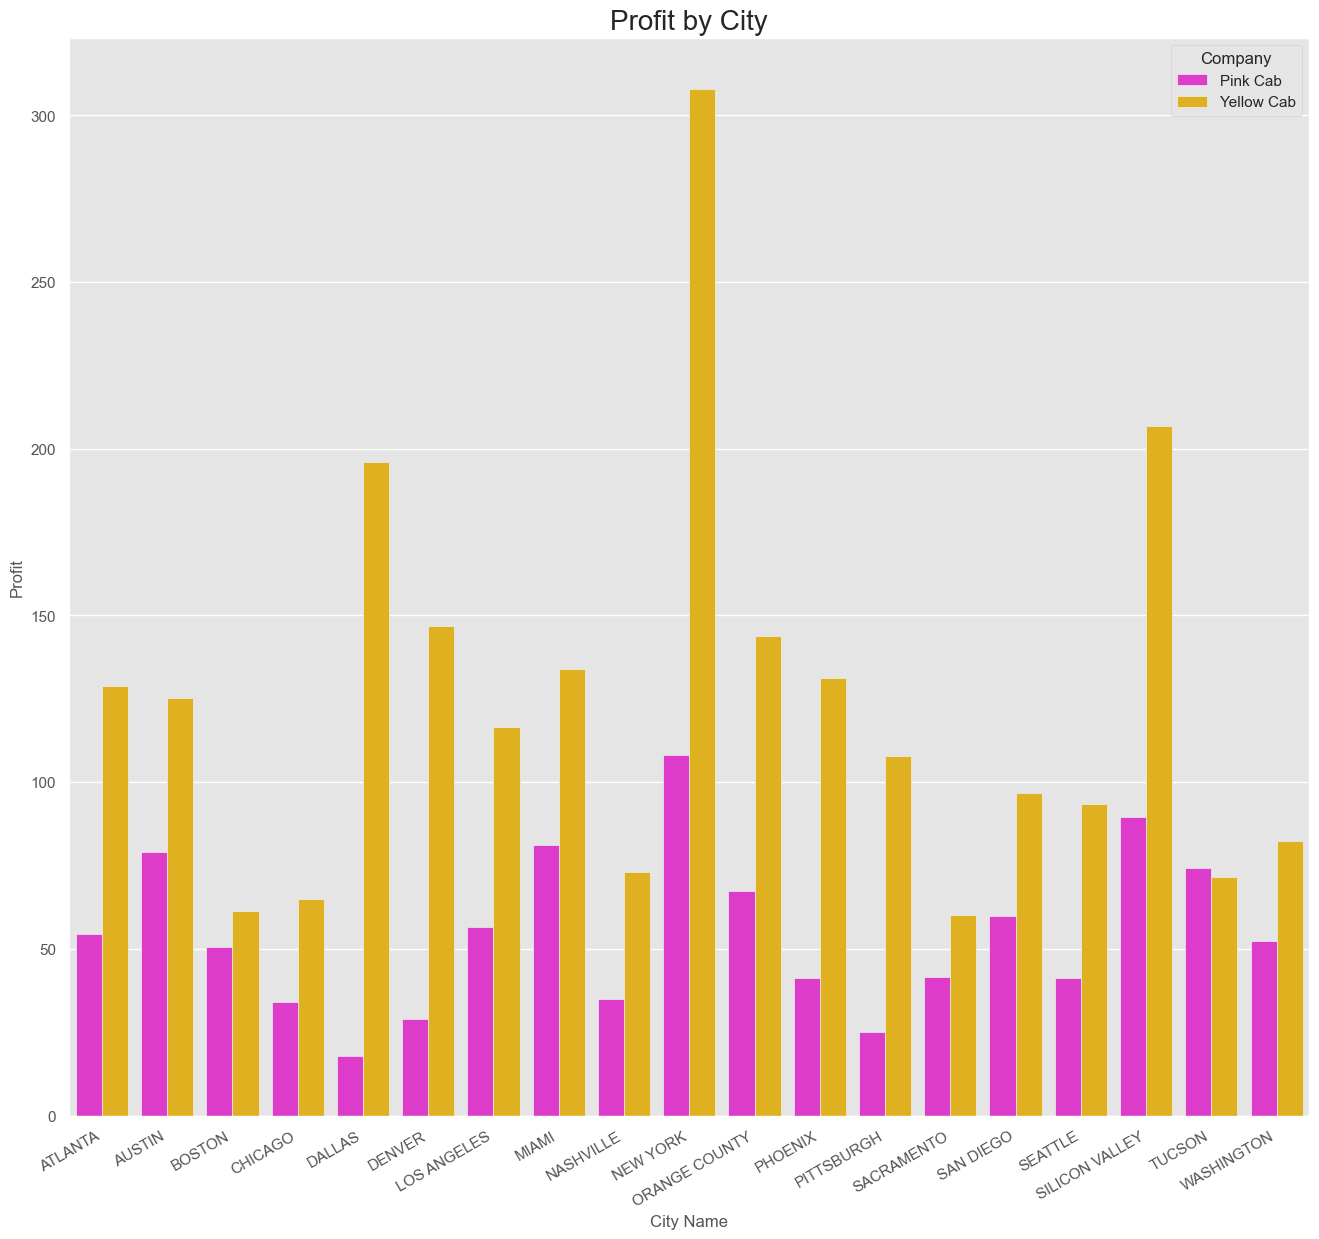

In [299]:
#Profit by City
plt.figure(figsize=(16, 14))
ax = sns.barplot(data=merged_df_updated, x="City", y="Profit %" , hue="Company", palette=colors, ci=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
plt.title("Avg. Profit % by City", size=20)
plt.ylabel("Avg. Profit %")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

#### 1.2 Profit Trend

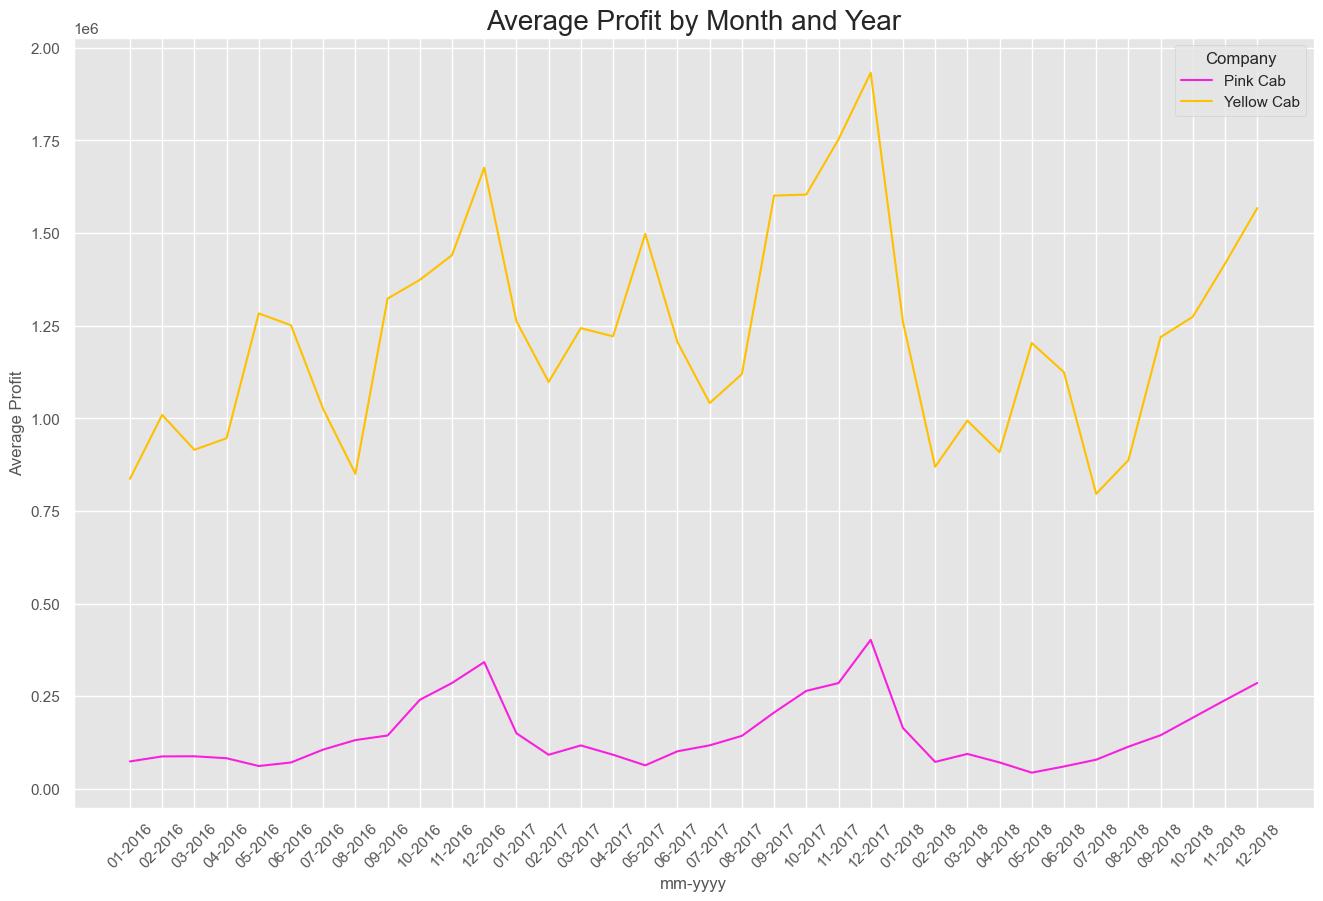

In [303]:
#Profit by month and year
plt.figure(figsize=(16, 10))
sns.lineplot(data=merged_df_updated, x="mm-yyyy", y="Profit" , hue="Company", palette=colors, ci=None, estimator='sum')
plt.title("Total Profit by Month and Year", size=20)
plt.xticks(rotation=45)
plt.ylabel("Total Profit")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

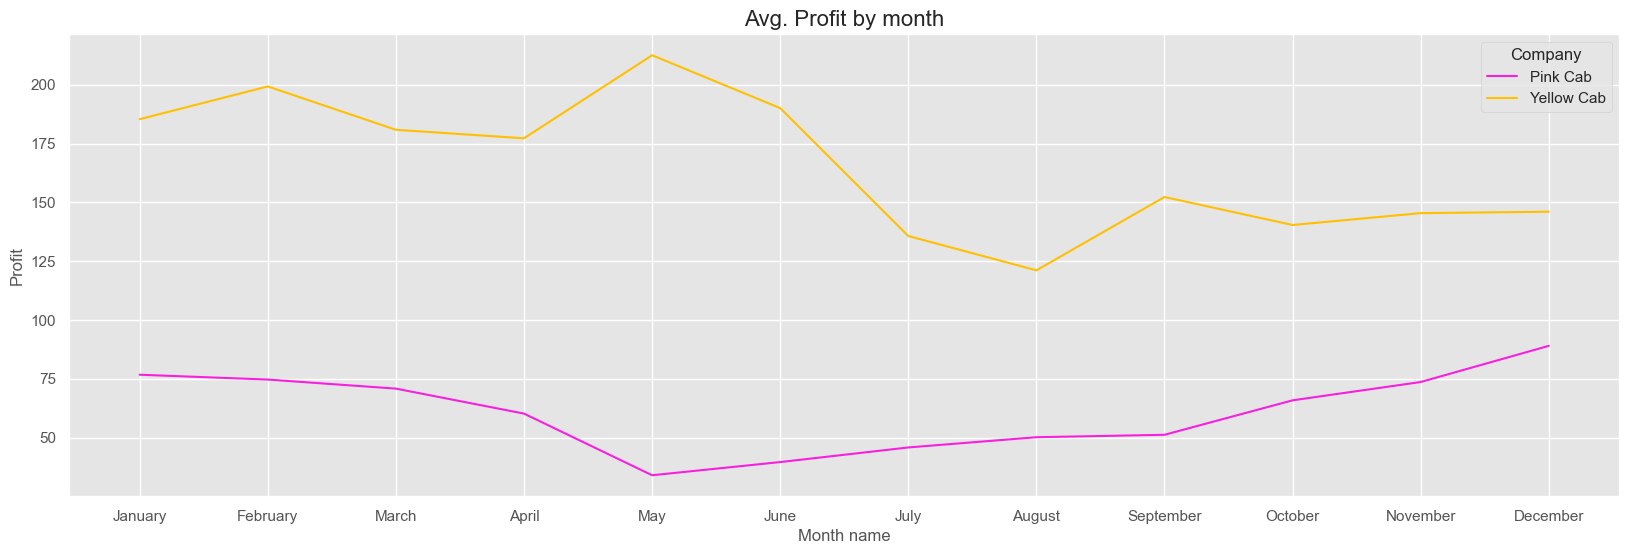

In [220]:
#Profit by month
plt.figure(figsize=(20, 6))
sns.lineplot(data=merged_df_updated, x="Month name", y="Profit" , hue="Company", palette=colors, ci=None)

plt.title("Avg. Profit by month", size=16)
filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

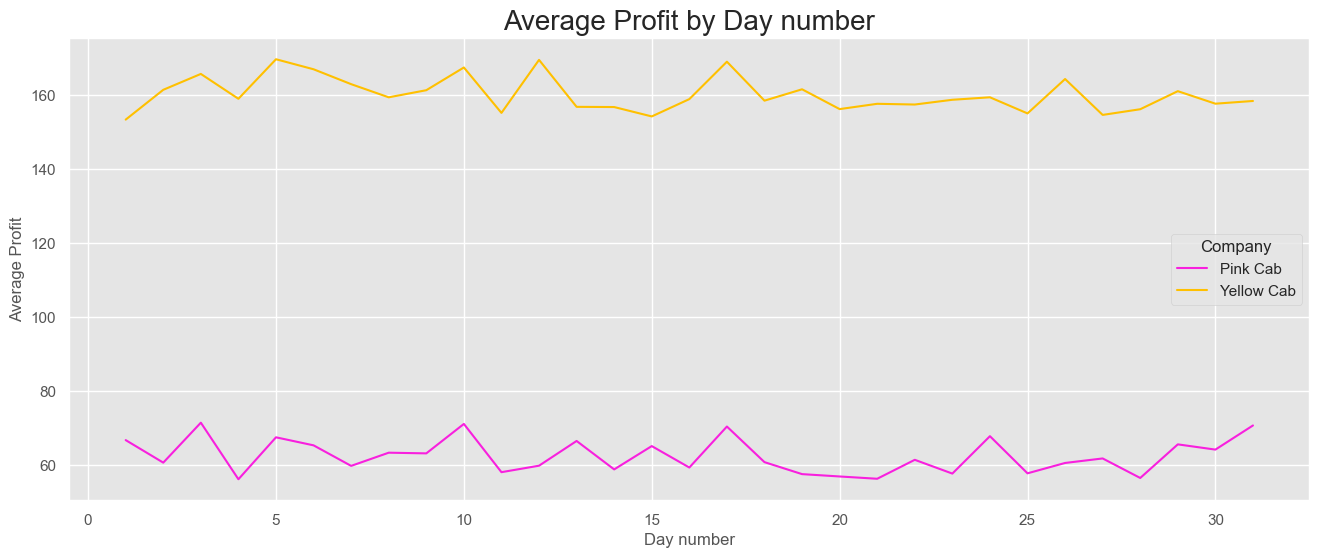

In [171]:
#Profit by Day number
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df_updated,x='Day number',y="Profit",hue='Company', palette=colors, ci=None)
plt.title("Average Profit by Day number", size=20)
plt.ylabel("Average Profit")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

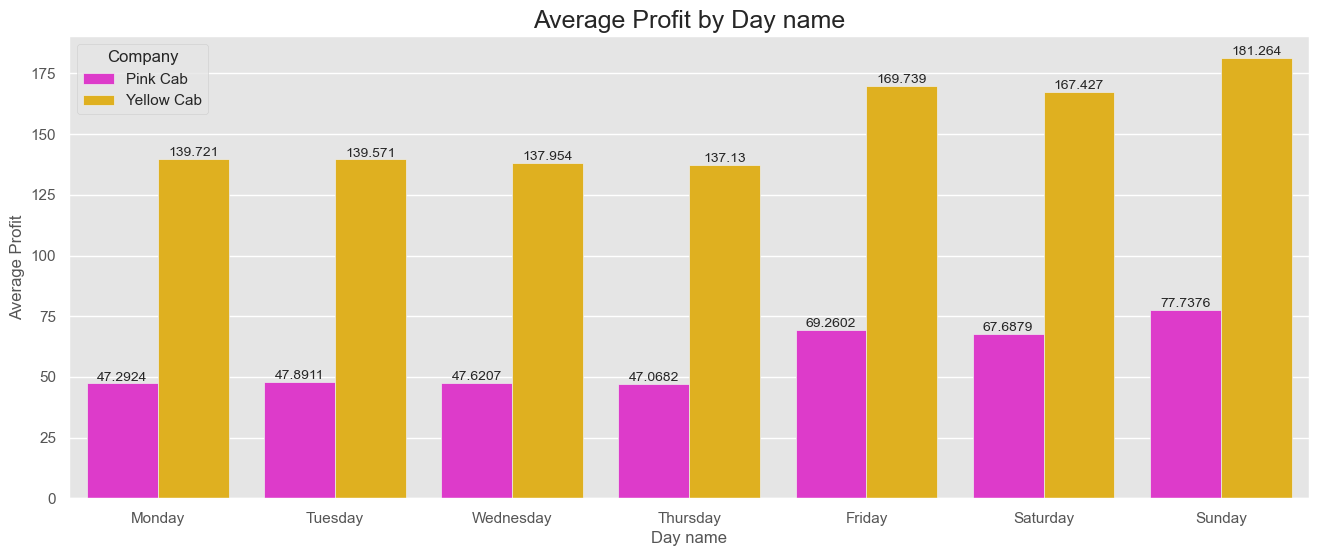

In [172]:
#Profit by Day name
plt.figure(figsize=(16, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(data=merged_df_updated, x="Day name", y="Profit" , hue="Company", palette=colors, order=day_order, ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Average Profit by Day name", size=18)
plt.ylabel("Average Profit")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

#### 1.3 Profit Analysis by Customer

<AxesSubplot: xlabel='Gender', ylabel='Profit %'>

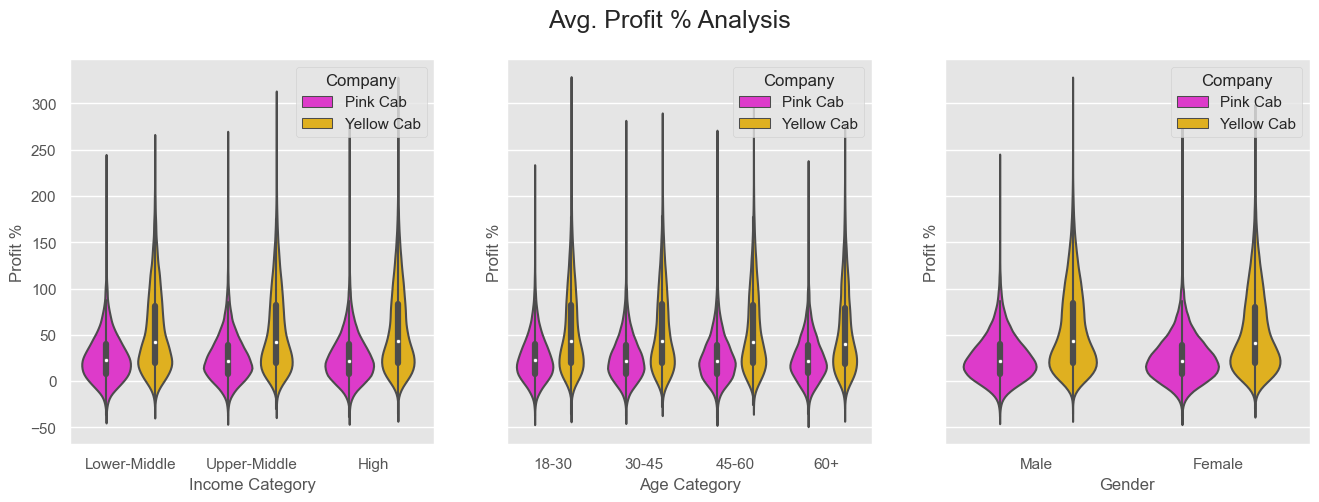

In [173]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharey=True)
fig.suptitle('Avg. Profit % Analysis', size=18)
# Create violin plots
sns.violinplot(data=merged_df_updated, x="Income Category", y="Profit %" , hue="Company", palette=colors, ax=ax[0])
sns.violinplot(data=merged_df_updated, x="Age Category", y="Profit %" , hue="Company", palette=colors, ax=ax[1])
sns.violinplot(data=merged_df_updated, x="Gender", y="Profit %" , hue="Company", palette=colors, ax=ax[2])

filename = 'G2M_plots/' + fig.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

### 2. Market presence Analysis

In [174]:
market_presence = pd.DataFrame()
market_presence['City'] = sorted(merged_df_updated['City'].unique())

total_cab_users, yellow_cab_users, pink_cab_users= [], [], []
for city in merged_df_updated['City'].unique():
    total_cab_users.append(city_cleaned[city_cleaned['City'] == city]['Users'].values[0])
    yellow_cab_users.append(merged_df_updated[(merged_df_updated['City'] == city) & (merged_df_updated['Company'] == "Yellow Cab")]['Customer ID'].nunique())
    pink_cab_users.append(merged_df_updated[(merged_df_updated['City'] == city) & (merged_df_updated['Company'] == "Pink Cab")]['Customer ID'].nunique())

market_presence['Total Cab Users'] = total_cab_users
market_presence['Yellow Cab Users'] = yellow_cab_users
market_presence['Pink Cab Users'] = pink_cab_users
market_presence['% of Yellow Cab Users'] = (market_presence['Yellow Cab Users']/market_presence['Total Cab Users'])*100
market_presence['% of Pink Cab Users'] = (market_presence['Pink Cab Users']/market_presence['Total Cab Users'])*100

market_presence

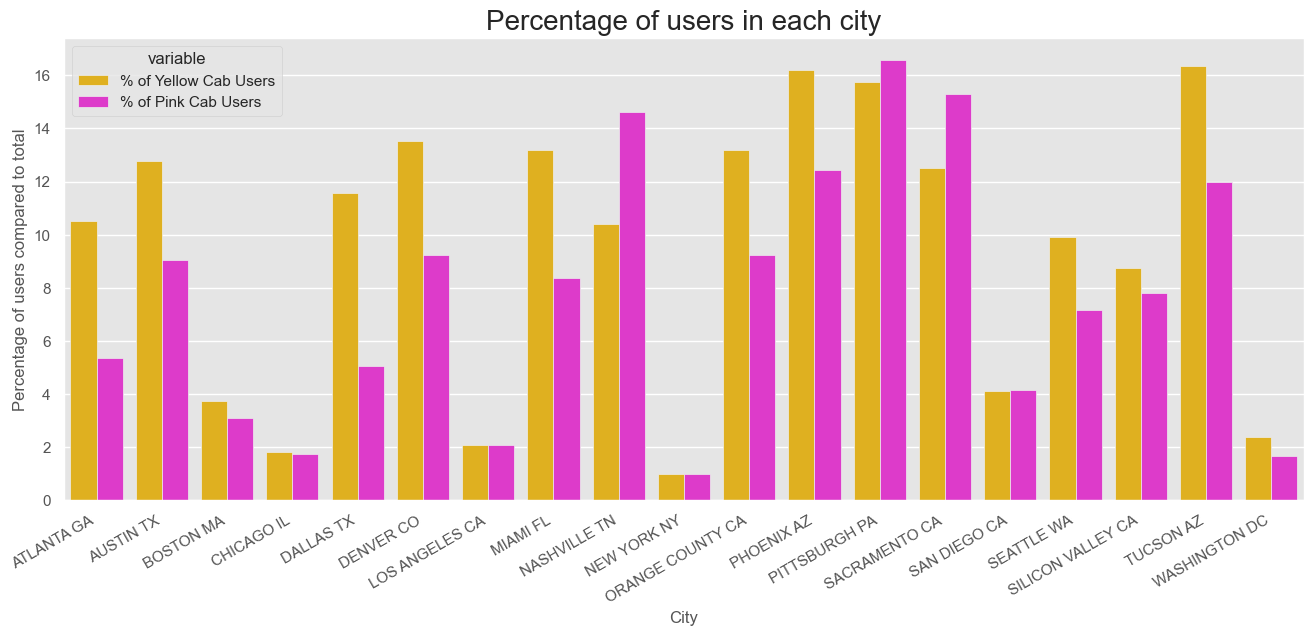

In [175]:
# Percentage of users compared to total users
plt.figure(figsize=(16,6))
df_melt = pd.melt(market_presence, id_vars=['City','Total Cab Users','Yellow Cab Users','Pink Cab Users'], var_name='variable', value_name='value')
ax = sns.barplot(data=df_melt, x="City", y='value', hue='variable', palette={'% of Yellow Cab Users':'#ffc000','% of Pink Cab Users':'#f820De'})
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
plt.title("Percentage of users in each city", size=20)
plt.ylabel("Percentage of users compared to total")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

In [176]:
#Average user base covered
print(f"Average user base covered by Yellow Cab: {market_presence['% of Yellow Cab Users'].mean():.2f}%")
print(f"Average user base covered by Pink Cab: {market_presence['% of Pink Cab Users'].mean():.2f}%")

Average user base covered by Yellow Cab: 9.46%
Average user base covered by Pink Cab: 7.68%


### 3. Seasonal Analysis

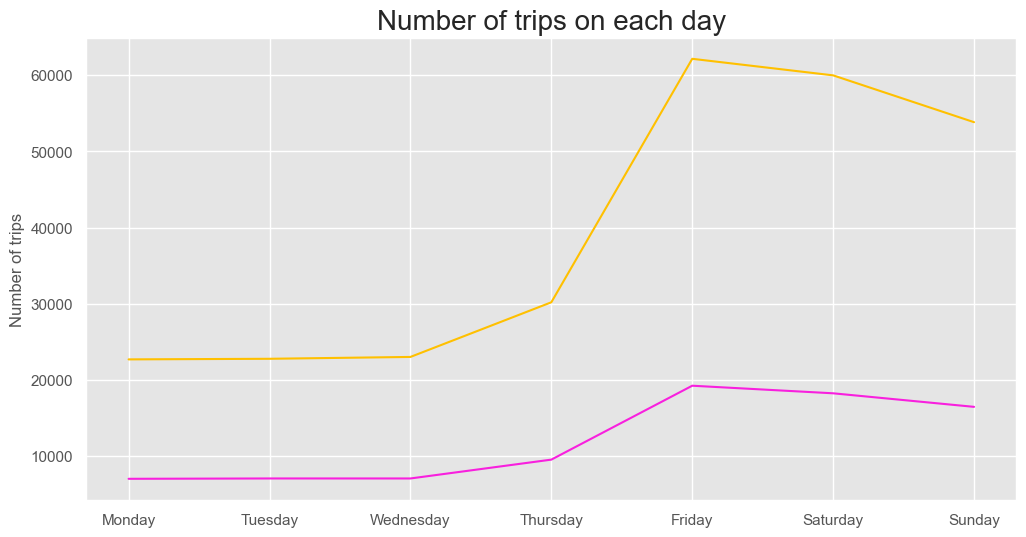

In [215]:
#Checking number of trips on each day for each company
plt.figure(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_df_updated['Day name'] = pd.Categorical(merged_df_updated['Day name'], categories=day_order, ordered=True)

for company in ['Yellow Cab', 'Pink Cab']:
    x = merged_df_updated[merged_df_updated['Company']==company]['Day name'].value_counts().keys()
    y = merged_df_updated[merged_df_updated['Company']==company]['Day name'].value_counts().values
    sns.lineplot(x=x, y=y,color=colors[company])

plt.title("Number of trips on each day", size=20)
plt.ylabel("Number of trips")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

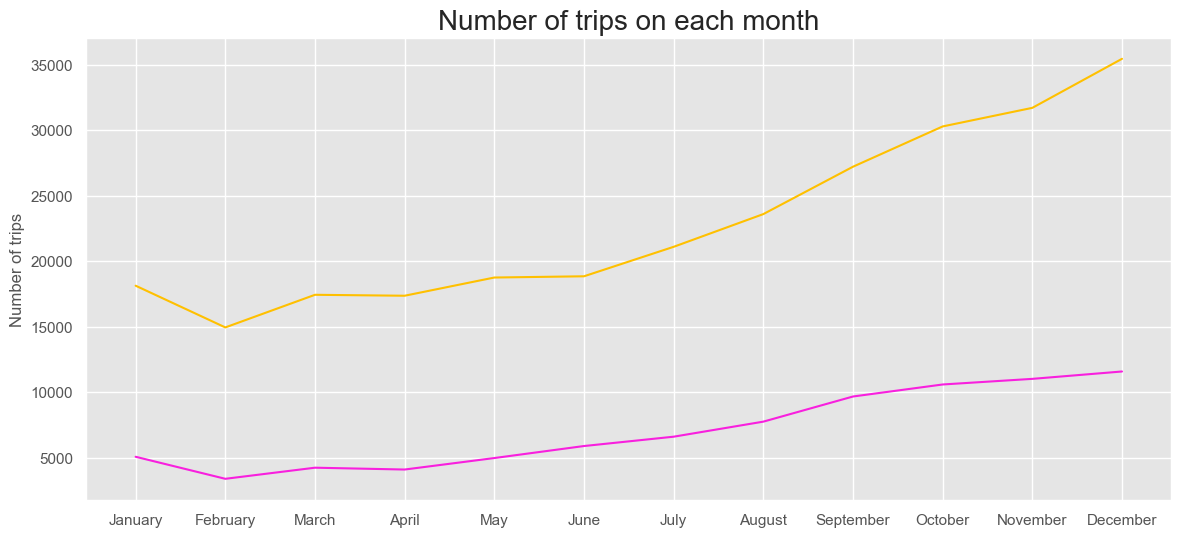

In [217]:
#Checking number of trips on each month for each company
plt.figure(figsize=(14, 6))

months = list(calendar.month_name)[1:]
merged_df_updated['Month name'] = pd.Categorical(merged_df_updated['Month name'], categories=months, ordered=True)

for company in ['Yellow Cab', 'Pink Cab']:
    x = merged_df_updated[merged_df_updated['Company']==company]['Month name'].value_counts().keys()
    y = merged_df_updated[merged_df_updated['Company']==company]['Month name'].value_counts().values
    sns.lineplot(x=x, y=y,color=colors[company])

plt.title("Number of trips on each month", size=20)
plt.ylabel("Number of trips")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

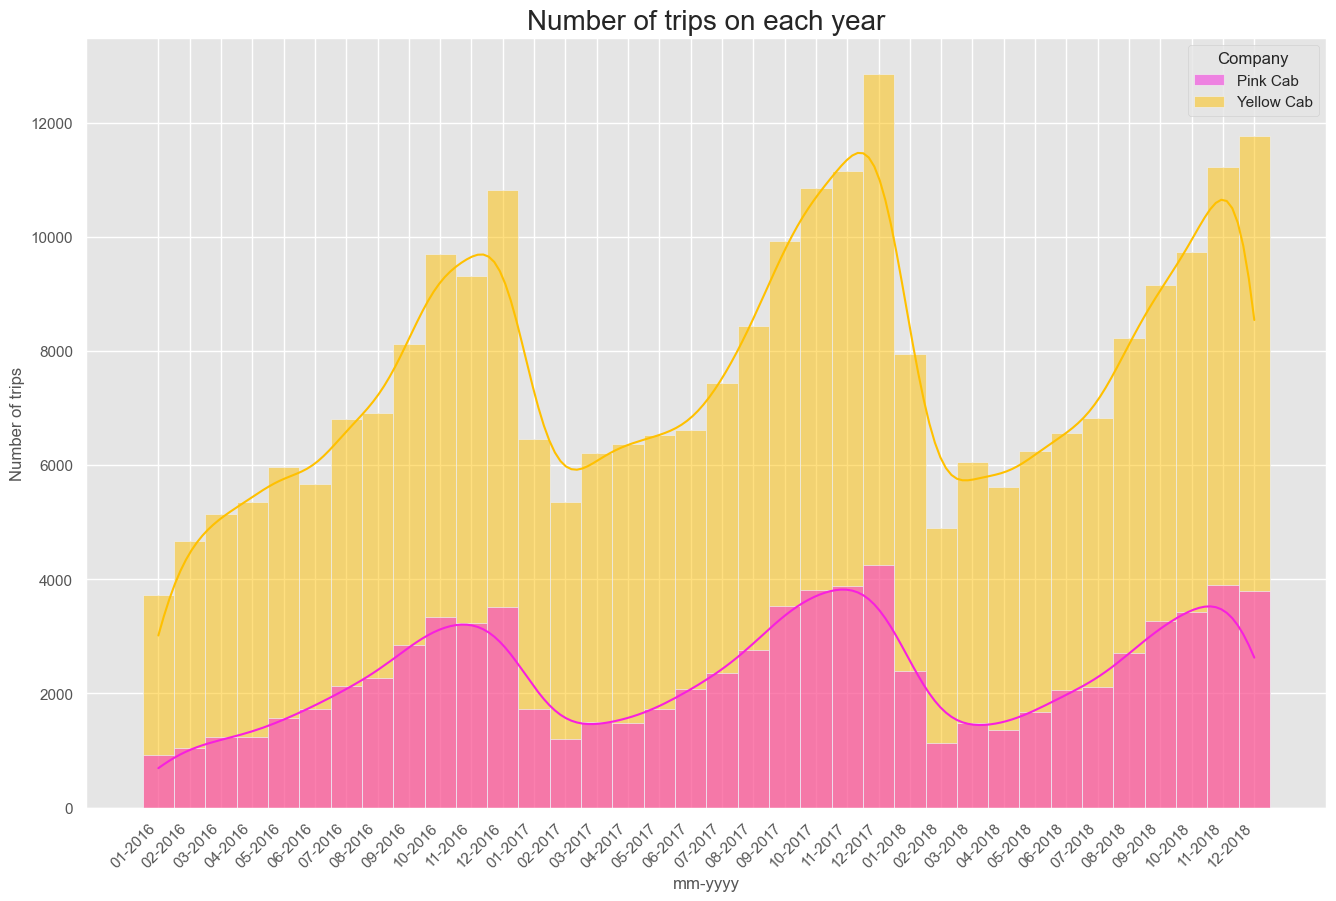

In [760]:
#Checking number of trips on each year for each company
plt.figure(figsize=(16, 10))
ax = sns.histplot(data=merged_df_updated, x="mm-yyyy", hue="Company", kde=True, palette=colors)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
plt.title("Number of trips on each year", size=20)
plt.ylabel("Number of trips")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

### 4. Customer Analysis

#### 4.1 Number of trips

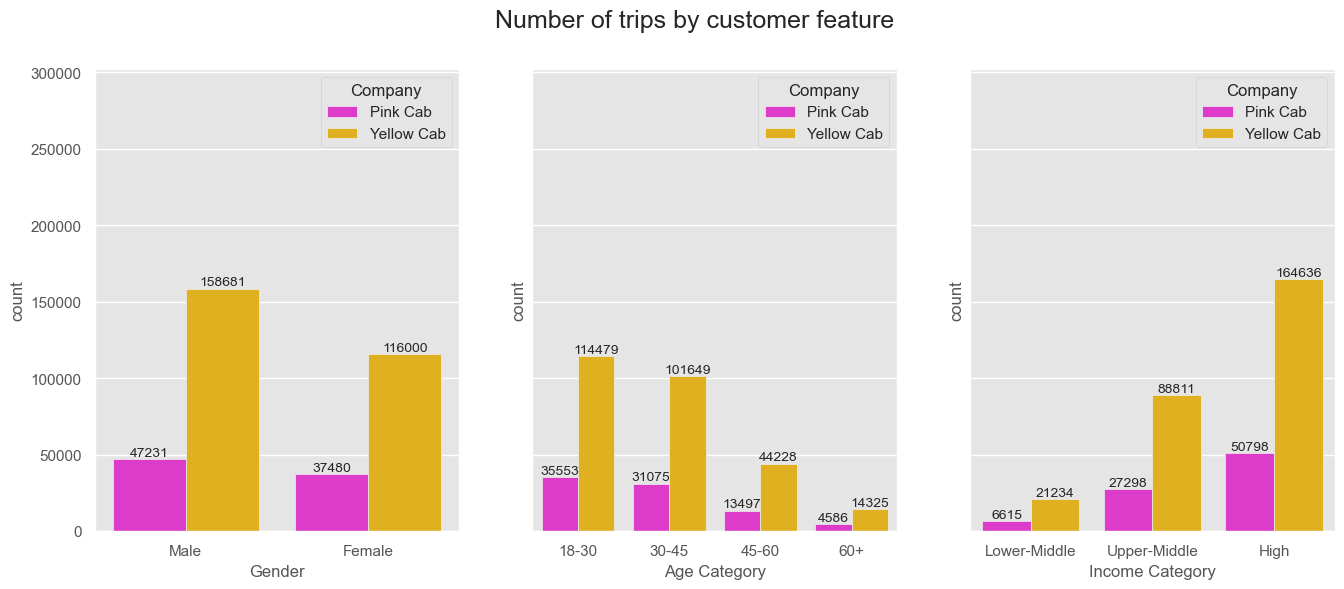

In [177]:
# Number of trips for each company
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6), sharey=True)

fig.suptitle('Number of trips by customer feature', size=18)
ax[0].set_ylim(0,market_presence['Total Cab Users'].max())
sns.countplot(data=merged_df_updated, x="Gender", hue='Company', palette=colors, ax=ax[0])
sns.countplot(data=merged_df_updated, x="Age Category", hue='Company', palette=colors, ax=ax[1])
sns.countplot(data=merged_df_updated, x="Income Category", hue='Company', palette=colors, ax=ax[2])
for i in range(3):
    for j in ax[i].containers:
        ax[i].bar_label(j,)

filename = 'G2M_plots/' + fig.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

#### 4.2 Average Distance Travelled

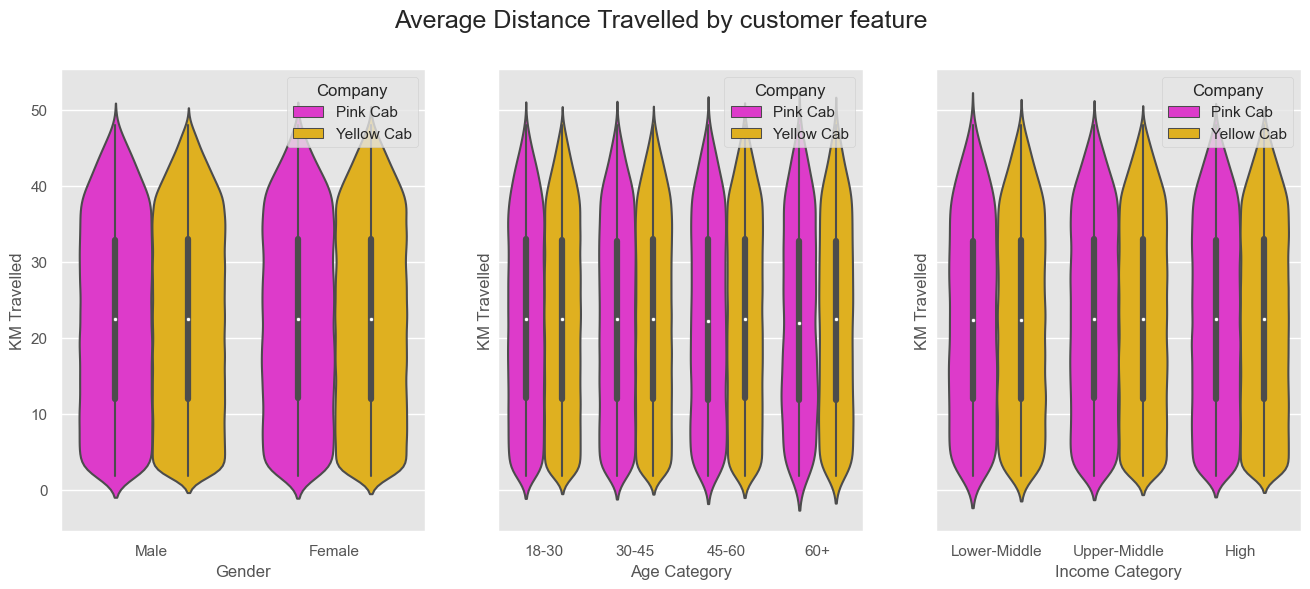

In [188]:
# Average Distance Travelled for each company
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6), sharey=True)

fig.suptitle('Average Distance Travelled by customer feature', size=18)

sns.violinplot(data=merged_df_updated, x="Gender", y="KM Travelled", hue='Company', palette=colors, ax=ax[0])
sns.violinplot(data=merged_df_updated, x="Age Category", y="KM Travelled", hue='Company', palette=colors, ax=ax[1])
sns.violinplot(data=merged_df_updated, x="Income Category", y="KM Travelled", hue='Company', palette=colors, ax=ax[2])

filename = 'G2M_plots/' + fig.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

## EDA Conclusions

It is obvious from the EDA that the Yellow Cab outperforms Pink Cab in almost all aspects. The following reasons strongly support the choice of Yellow cabs for investment:

1) Yellow Cabs only cover 9-10% of the total consumer market on average. Meaning there is still room for growth.
2) Yellow Cabs have increased their total profit over the years even though average profit has slightly decreased. This shows Yellow cabs' success in customer acquisition over the years.
3) Yellow Cab customers seem to have significantly more trips than Pink Cab customers and the average distance travelled is same. This shows Yellow Cab has also been successful in customer retention.

#### Additional Insights:

1) Number of trips increase over the year, peaking at the tail-end of a year.
2) Higher Income Customers use the cab services more than lower income customers.
3) Younger Customers use the cab services more than older customers.
4) Male Customers the cab services more than Female Customers.
5) Cities with higher population use the cab services more than other cities.
6) Majority of the market is untapped by both the companies.
7) More profit is earned on weekends than on weekdays.
8) More profit is earned in cities with higher population.

## Hypothesis Testing

### 1. Exploring Profit Variation

#### 1.1 Hypothesis: Does Gender affect the profit made
H0: There is no significant difference in profit between the different gender categories.
H1: There is a significant difference in profit between the different gender categories.

In [761]:
Profit_Male = merged_df_updated[(merged_df_updated.Gender=='Male')].groupby('Transaction ID').Profit.mean()
Profit_Female = merged_df_updated[(merged_df_updated.Gender=='Female')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(Profit_Male.values,
                             Profit_Female.values,
                             equal_var=True)

print(f'P value: {p_value:.4f}')
if p_value>0.05:
    print('Rejecting H0: There is no significant difference in profit between the different gender categories.')
else:
    print('Accepting H0: There is a significant difference in profit between the different gender categories.')

P value: 0.0000
Accepting H0: There is a significant difference in profit between the different gender categories.


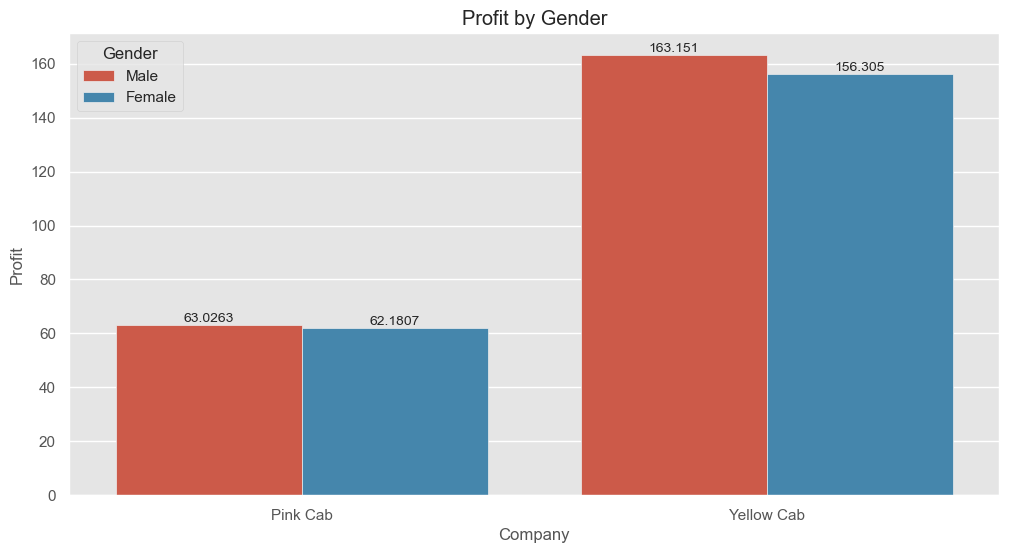

In [762]:
#Visualizing the distribution of profit for the three categories
plt.figure(figsize=(12,6))
ax = sns.barplot(data=merged_df_updated,x="Company",y="Profit",hue="Gender", ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Profit by Gender")
plt.ylabel("Profit")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

In [763]:
for company in ['Yellow Cab', 'Pink Cab']:
    Profit_Male = merged_df_updated[(merged_df_updated.Gender=='Male')&(merged_df_updated['Company']==company)].groupby('Transaction ID').Profit.mean()
    Profit_Female = merged_df_updated[(merged_df_updated.Gender=='Female')&(merged_df_updated['Company']==company)].groupby('Transaction ID').Profit.mean()

    print(f"For {company}")
    _, p_value = stats.ttest_ind(Profit_Male.values,
                                 Profit_Female.values,
                                 equal_var=True)

    print(f'P value: {p_value:.4f}')
    if p_value>0.05:
        print('Rejecting H0: There is no significant difference in profit between the different gender categories.')
    else:
        print('Accepting H0: There is a significant difference in profit between the different gender categories.')

    print("---------------------------------------------------------------------------------")

For Yellow Cab
P value: 0.0000
Accepting H0: There is a significant difference in profit between the different gender categories.
---------------------------------------------------------------------------------
For Pink Cab
P value: 0.1152
Rejecting H0: There is no significant difference in profit between the different gender categories.
---------------------------------------------------------------------------------


Conclusion: The difference is more prominent for Yellow Cab than for Pink Cab

#### 1.2 Hypothesis: Does the age category affect the profit made?

H0: There is no significant difference in profit between the different age categories.
H1: There is a significant difference in profit between the different age categories.

In [764]:
# Create separate groups for each distance category
categories=[]
for category in merged_df_updated['Age Category'].unique():
    categories.append(merged_df_updated[merged_df_updated['Age Category'] == category].groupby('Transaction ID').Profit.mean())

# Perform the ANOVA test
_, p_value = stats.f_oneway(*categories)

# Print the results
print(f"p-value: {p_value:.4f}")
#Testing the hypothesis
if p_value>0.05:
    print("Accepting H0: There is no significant difference in profit between the different age categories.")
else:
    print("Rejecting H0: There is a significant difference in profit between the different age categories.")

p-value: 0.0000
Rejecting H0: There is a significant difference in profit between the different age categories.


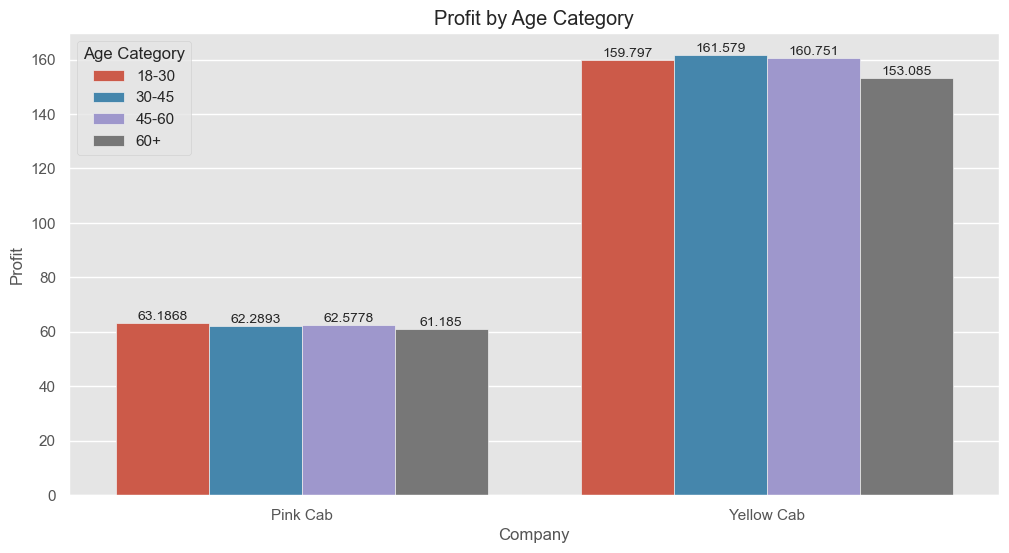

In [765]:
#Visualizing the distribution of profit for the three categories
plt.figure(figsize=(12,6))
ax = sns.barplot(data=merged_df_updated,x="Company",y="Profit",hue="Age Category", ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Profit by Age Category")
plt.ylabel("Profit")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

In [307]:
for company in ['Yellow Cab', 'Pink Cab']:
    categories=[]
    for category in merged_df_updated['Age Category'].unique():
        categories.append(merged_df_updated[(merged_df_updated['Age Category'] == category)&(merged_df_updated['Company']==company)].groupby('Transaction ID').Profit.mean())

    print(f"For {company}")
    # Perform the ANOVA test
    _, p_value = stats.f_oneway(*categories)

    # Print the results
    print(f"p-value: {p_value:.4f}")
    #Testing the hypothesis
    if p_value>0.05:
        print("Accepting H0: There is no significant difference in profit between the different age categories.")
    else:
        print("Rejecting H0: There is a significant difference in profit between the different age categories.")

    print("---------------------------------------------------------------------------------")

For Yellow Cab
p-value: 0.0000
Rejecting H0: There is a significant difference in profit between the different age categories.
---------------------------------------------------------------------------------
For Pink Cab
p-value: 0.2593
Accepting H0: There is no significant difference in profit between the different age categories.
---------------------------------------------------------------------------------


Conclusion: The difference seems to be most prominent for Senior Adult Yellow Cab Users and other Yellow Cab Users.

#### 1.3 Hypothesis: Does the income category affect the profit made?

H0: There is no significant difference in profit between the different income categories.
H1: There is a significant difference in profit between the different income categories.

In [767]:
# Create separate groups for each distance category
lm_group = merged_df_updated[merged_df_updated['Income Category'] == 'Lower-Middle'].groupby('Transaction ID').Profit.mean()
um_group = merged_df_updated[merged_df_updated['Income Category'] == 'Upper-Middle'].groupby('Transaction ID').Profit.mean()
high_group = merged_df_updated[merged_df_updated['Income Category'] == 'High'].groupby('Transaction ID').Profit.mean()

# Perform the ANOVA test
_, p_value = stats.f_oneway(lm_group,um_group,high_group)

# Print the results
print(f"p-value: {p_value:.4f}")
#Testing the hypothesis
if p_value>0.05:
    print("Accepting H0: There is no significant difference in profit between the different income categories.")
else:
    print("Rejecting H0: There is a significant difference in profit between the different income categories.")

p-value: 0.0000
Rejecting H0: There is a significant difference in profit between the different income categories.


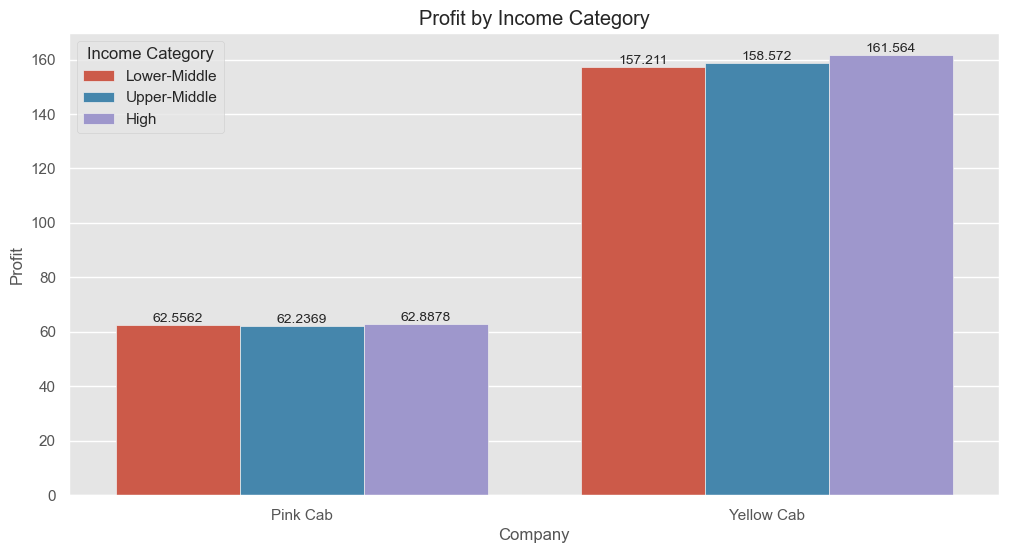

In [768]:
#Visualizing the distribution of profit for the three categories
plt.figure(figsize=(12,6))
ax = sns.barplot(data=merged_df_updated,x="Company",y="Profit",hue="Income Category", ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Profit by Income Category")
plt.ylabel("Profit")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

In [769]:
for company in ['Yellow Cab', 'Pink Cab']:
    lm_group = merged_df_updated[(merged_df_updated['Income Category'] == 'Lower-Middle')&(merged_df_updated['Company']==company)].groupby('Transaction ID').Profit.mean()
    um_group = merged_df_updated[(merged_df_updated['Income Category'] == 'Upper-Middle')&(merged_df_updated['Company']==company)].groupby('Transaction ID').Profit.mean()
    high_group = merged_df_updated[(merged_df_updated['Income Category'] == 'High')&(merged_df_updated['Company']==company)].groupby('Transaction ID').Profit.mean()

    print(f"For {company}")
    # Perform the ANOVA test
    _, p_value = stats.f_oneway(lm_group,um_group,high_group)

    # Print the results
    print(f"p-value: {p_value:.4f}")
    #Testing the hypothesis
    if p_value>0.05:
        print("Accepting H0: There is no significant difference in profit between the different income categories.")
    else:
        print("Rejecting H0: There is a significant difference in profit between the different income categories.")

    print("---------------------------------------------------------------------------------")

For Yellow Cab
p-value: 0.0000
Rejecting H0: There is a significant difference in profit between the different income categories.
---------------------------------------------------------------------------------
For Pink Cab
p-value: 0.5324
Accepting H0: There is no significant difference in profit between the different income categories.
---------------------------------------------------------------------------------


Conclusion: The difference seems to be most prominent among High-Income Yellow Cab Users and other Yellow Cab Users.

### 2. Exploring Seasonal Variation

#### 2.1 Hypothesis: Does the time of year affect the average distance of trip?

H0: The average KM Travelled is the same across different time of year (mm-yyyy) categories.
H1: The average KM Travelled varies significantly across different time of year (mm-yyyy) categories.

In [770]:
#Making a list of all the mm-yyyy groups for the ANOVA test
anova_test_list=[]
for month_year in merged_df_updated['mm-yyyy'].unique():
    group_df = merged_df_updated[merged_df_updated['mm-yyyy'] == month_year].groupby('Transaction ID')
    group = group_df['KM Travelled'].mean()
    anova_test_list.append(group)

In [771]:
# Perform the ANOVA test
_, p_value = stats.f_oneway(*anova_test_list)

# Print the results
print(f"p-value: {p_value:.4f}")
#Testing the hypothesis
if p_value>0.05:
    print("Accepting H0: The average KM Travelled is the same across different time of year (mm-yyyy) categories.")
else:
    print("Rejecting H0: The average KM Travelled varies significantly across different time of year (mm-yyyy) categories.")

p-value: 0.8022
Accepting H0: The average KM Travelled is the same across different time of year (mm-yyyy) categories.


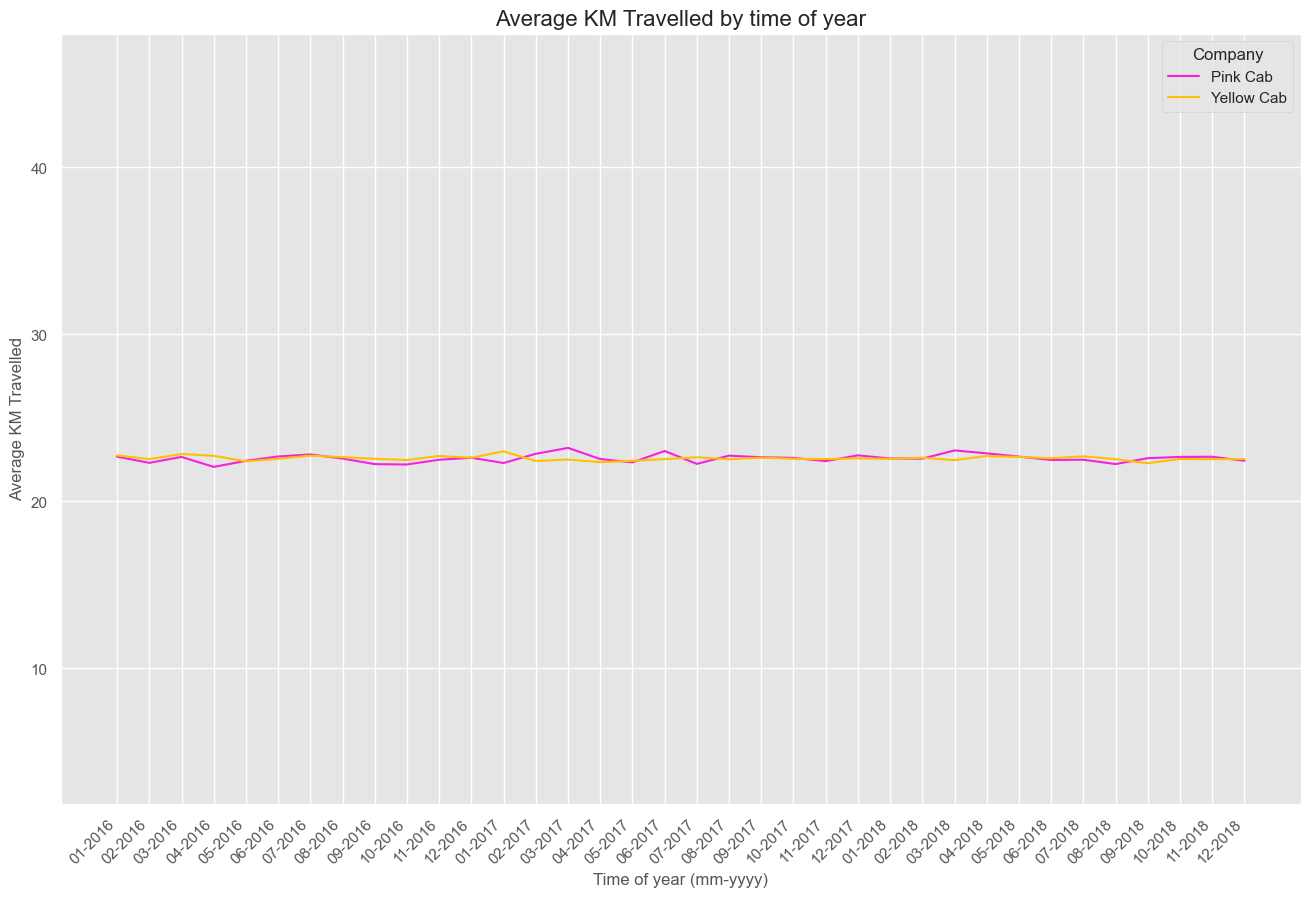

In [772]:
#Visualizing the variation of KM Travelled by time of year
plt.figure(figsize=(16,10))
ax = sns.lineplot(data=merged_df_updated,x="mm-yyyy",y="KM Travelled",hue="Company", ci=None, palette=colors)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_ylim(merged_df_updated['KM Travelled'].min(),merged_df_updated['KM Travelled'].max())
plt.title("Average KM Travelled by time of year", size=16)
plt.ylabel("Average KM Travelled")
plt.xlabel("Time of year (mm-yyyy)")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

#### 2.2 Hypothesis: Does the time of year affect the average price charged?

H0: The average Price Charged is the same across different time of year (mm-yyyy) categories.
H1: The average Price Charged varies significantly across different time of year (mm-yyyy) categories.

In [773]:
#Making a list of all the mm-yyyy groups for the ANOVA test
anova_test_list=[]
for month_year in merged_df_updated['mm-yyyy'].unique():
    group_df = merged_df_updated[merged_df_updated['mm-yyyy'] == month_year].groupby('Transaction ID')
    group = group_df['Price Charged'].mean()
    anova_test_list.append(group)

In [774]:
# Perform the ANOVA test
_, p_value = stats.f_oneway(*anova_test_list)

# Print the results
print(f"p-value: {p_value:.4f}")
#Testing the hypothesis
if p_value>0.05:
    print("Accepting H0: The average Price Charged is the same across different time of year (mm-yyyy) categories.")
else:
    print("Rejecting H0: The average Price Charged varies significantly across different time of year (mm-yyyy) categories.")

p-value: 0.0000
Rejecting H0: The average Price Charged varies significantly across different time of year (mm-yyyy) categories.


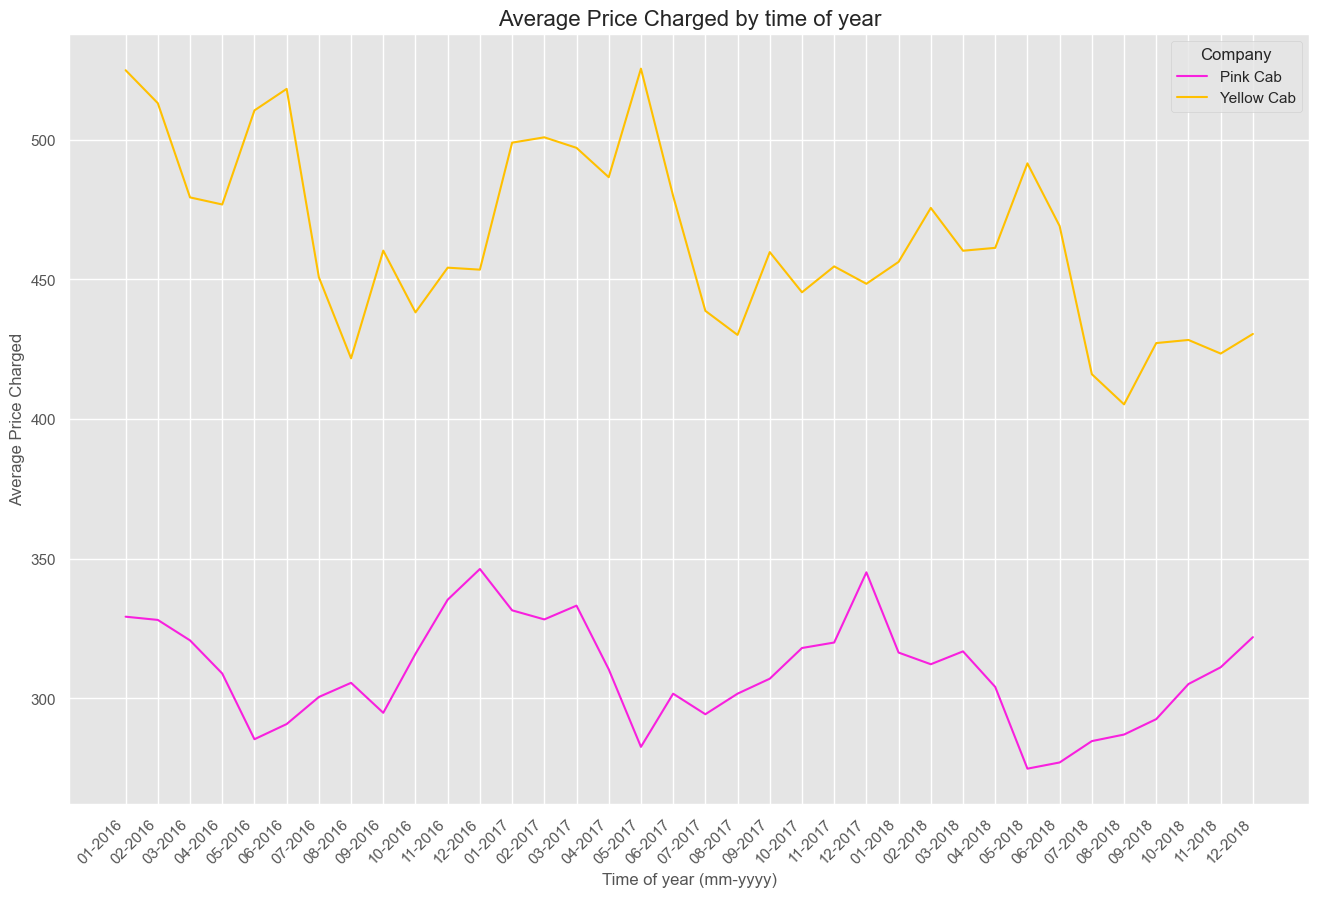

In [775]:
#Visualizing the variation of KM Travelled by time of year
plt.figure(figsize=(16,10))
ax = sns.lineplot(data=merged_df_updated,x="mm-yyyy",y="Price Charged",hue="Company", ci=None, palette=colors)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
plt.title("Average Price Charged by time of year", size=16)
plt.ylabel("Average Price Charged")
plt.xlabel("Time of year (mm-yyyy)")

filename = 'G2M_plots/' + plt.gca().get_title().lower().replace(' ', '_') + '.png'
plt.savefig(filename)

In [776]:
for company in ['Yellow Cab', 'Pink Cab']:
    anova_test_list=[]
    for month_year in merged_df_updated['mm-yyyy'].unique():
        group_df = merged_df_updated[(merged_df_updated['mm-yyyy'] == month_year)&(merged_df_updated['Company']==company)].groupby('Transaction ID')
        group = group_df['Price Charged'].mean()
        anova_test_list.append(group)

    print(f"For {company}")
    # Perform the ANOVA test
    _, p_value = stats.f_oneway(*anova_test_list)

    # Print the results
    print(f"p-value: {p_value:.4f}")
    #Testing the hypothesis
    if p_value>0.05:
        print("Accepting H0: The average Price Charged is the same across different time of year (mm-yyyy) categories.")
    else:
        print("Rejecting H0: The average Price Charged varies significantly across different time of year (mm-yyyy) categories.")

    print("---------------------------------------------------------------------------------")

For Yellow Cab
p-value: 0.0000
Rejecting H0: The average Price Charged varies significantly across different time of year (mm-yyyy) categories.
---------------------------------------------------------------------------------
For Pink Cab
p-value: 0.0000
Rejecting H0: The average Price Charged varies significantly across different time of year (mm-yyyy) categories.
---------------------------------------------------------------------------------


Conclusion:
1) For Yellow Cab: The prices charged are higher than pink cab. The trend shows higher charges in spring and lower charges in summer. This variation could be to counter losses in off-season during spring as compared to summer. Company could be offering discounts in the winter since this explains lower profitability in that time inspite of higher demand.
2) For Pink Cab: The prices charged are lower than yellow cab. The trend shows lower charges in spring and higher charges in summer. The lower charges could have been done to attract the yellow cab users during spring.  The higher charges could be to counter the losses of spring since summer has more demand. Company could be offering discounts in the winter since this explains lower profitability in that time inspite of higher demand.

### 3. Exploring other possible variations

#### 3.1 Is Payment Mode associated with any other categorical features?

H0: The distribution of Payment Mode is the same for all feature categories.
H1: The distribution of Payment Mode varies significantly across different feature categories.

In [777]:
merged_df_updated.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Day name,mm-yyyy,Day number,Distance Category,Age Category,Income Category,Profit,Profit %,City Name,State Name
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,...,Friday,01-2016,8,Long Trip,18-30,Upper-Middle,57.315,18.274427,ATLANTA,GA
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,...,Wednesday,01-2016,6,Medium Trip,18-30,Upper-Middle,23.666,7.067558,ATLANTA,GA
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,...,Saturday,01-2016,2,Short Trip,45-60,Upper-Middle,27.568,28.236644,ATLANTA,GA
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,...,Thursday,01-2016,7,Long Trip,18-30,High,25.798,7.337273,ATLANTA,GA
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,...,Sunday,01-2016,3,Short Trip,30-45,Upper-Middle,16.844,17.227131,ATLANTA,GA


In [778]:
features_to_test = ['Income Category','Age Category','Gender','Distance Category','Company','City','Month name']

for feature in features_to_test:
    contingency_table = pd.crosstab(merged_df_updated["Payment_Mode"],merged_df_updated[feature])
    _, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Print the results
    print(feature)
    print(f"p-value: {p_value:.4f}")
    #Testing the hypothesis
    if p_value>0.05:
        print(f"Accepting H0: The distribution of Payment Mode is the same for all {feature} categories.")
    else:
        print(f"Rejecting H0: The distribution of Payment Mode varies significantly across different {feature} categories.")

    print("--------------------------------------------------------")

Income Category
p-value: 0.9229
Accepting H0: The distribution of Payment Mode is the same for all Income Category categories.
--------------------------------------------------------
Age Category
p-value: 0.3291
Accepting H0: The distribution of Payment Mode is the same for all Age Category categories.
--------------------------------------------------------
Gender
p-value: 0.9645
Accepting H0: The distribution of Payment Mode is the same for all Gender categories.
--------------------------------------------------------
Distance Category
p-value: 0.2900
Accepting H0: The distribution of Payment Mode is the same for all Distance Category categories.
--------------------------------------------------------
Company
p-value: 0.5412
Accepting H0: The distribution of Payment Mode is the same for all Company categories.
--------------------------------------------------------
City
p-value: 0.1042
Accepting H0: The distribution of Payment Mode is the same for all City categories.
-----------

#### 3.2 Is Distance Category associated with any other categorical features?

H0: The distribution of Distance Category is the same for all feature categories.
H1: The distribution of Distance Category varies significantly across different feature categories.

In [779]:
features_to_test = ['Income Category','Age Category','Gender','Payment_Mode','Company','City','Month name']

for feature in features_to_test:
    contingency_table = pd.crosstab(merged_df_updated["Distance Category"],merged_df_updated[feature])
    _, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Print the results
    print(feature)
    print(f"p-value: {p_value:.4f}")
    #Testing the hypothesis
    if p_value>0.05:
        print(f"Accepting H0: The distribution of Distance Category is the same for all {feature} categories.")
    else:
        print(f"Rejecting H0: The distribution of Distance Category varies significantly across different {feature} categories.")

    print("--------------------------------------------------------")

Income Category
p-value: 0.7485
Accepting H0: The distribution of Distance Category is the same for all Income Category categories.
--------------------------------------------------------
Age Category
p-value: 0.2502
Accepting H0: The distribution of Distance Category is the same for all Age Category categories.
--------------------------------------------------------
Gender
p-value: 0.9208
Accepting H0: The distribution of Distance Category is the same for all Gender categories.
--------------------------------------------------------
Payment_Mode
p-value: 0.2900
Accepting H0: The distribution of Distance Category is the same for all Payment_Mode categories.
--------------------------------------------------------
Company
p-value: 0.9677
Accepting H0: The distribution of Distance Category is the same for all Company categories.
--------------------------------------------------------
City
p-value: 0.5275
Accepting H0: The distribution of Distance Category is the same for all City cat